#Construcción de un modelo de clasificación empleando redes neuronales




In [31]:
#Funciones para la visualización
#Importación de librerias
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt

# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y, size=None):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k', s=size,
                    label="Clase %s" % this_y)
    pl.legend(loc="best")
    pl.title("Datos")

# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun



## Neurona artificial

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/600px-ArtificialNeuronModel_english.png" >

* El perceptrón es un algoritmo de clasificación que genera una predicción para una entrada $(x)$ de la siguiente manera:
$$\textrm{Predicción}(x)=\begin{cases}
C_{1} & \mbox{si }f(x)\ge \theta\\
C_{2} & \mbox{si }f(x)<\theta
\end{cases}$$

* De igual forma, $f(x)$ está definida como una suma ponderada sobre los elementos de la entrada:
$$
f(x) =  \sum_{i=1}^{n} {w_i x_i}
$$
dónde $x$ corresponde a la entrada, $w$ corresponde a los pesos que se multiplican por la entrada $x$ y $w_0$ al sesgo.

* Para poder generar $\textrm{Predicción}(x)$, se toma la salida de $f(x)$ y se le aplica una **función de activación** $\varphi$. Así la salida del perceptrón es de la siguiente forma:
$$
y = \varphi( \sum_{i=1}^{n} {w_i x_i})
$$

* Es común encontrar en la literatura que se mencione que una neurona se activó, si su valor de la salida $y$ superó el umbral $\theta$ definido para la neurona.

**¿Cómo escoger $\varphi$?**

## Función de activación de paso

El caso más sencillo se conoce como la función de activación de paso. La función de activación de paso se define de la siguiente manera:

$$\phi(x)=\begin{cases}
0 & \mbox{si }x\leq \theta\\
1 & \mbox{si }x>\theta
\end{cases}$$

La cual observamos a continuación

<img src="https://drive.google.com/uc?export=view&id=1keTYepWcLZqtHFMXP6ix2FnIFcqrwHAN" align="middle">

## Función de activación logística

La función de activación logística está basada en la función sigmoide $\sigma$. La función sigmoíde para cualquier valor $z$ se define de la siguiente manera:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

<img width= 300 src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/SigmoidFunction.png/400px-SigmoidFunction.png" align="middle">

Cómo se puede observar en la imagen, la función sigmoide genera valores entre $0$ y $1$. A diferencia de la función de activación de paso, la sigmoide genera una transición entre $0$ y $1$. La salida del perceptrón queda definida de la siguiente manera:

$$
y = \sigma(\theta + \sum_{i=1}^{n} {w_i x_i})
$$

In [20]:
from math import exp
#Calculo del valor de sigma
#sigma=1/1-exp(-x)
def sigma(n):
  return 1/(1+exp(-n))

print(sigma(0))

0.5


## Implementación del perceptrón en Scikit-Learn

Un perceptron es una red neuronal sin capas intermedias, es decir solo un capa de salida, las neuronas en la capa de salida usan la función de activación de paso. Usando `sklearn.linear_model.Perceptron` podemos encontrar la implementación del perceptrón. El entrenamiento del modelo se hace usando gradiente descendente.

In [21]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
print(clf)

Perceptron()


### ¿Cómo programar una neurona para calcular la función `AND`?

| $$X$$ | $$ Y $$ | $$ X\&Y $$ |
| - | - | - |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

### AND Neural Network

<img src="https://i.imgur.com/u2DeapF.png" align="middle">

Para *programar* manualmente el perceptron, vamos a fijar sus parámetros con las siguientes instrucciones:

In [22]:
clf.coef_ = np.array([[0.7, -0.3]])
clf.intercept_ = np.array([1])
clf.classes_ = np.array([0, 1])
print("Done!!!")

Done!!!


Ahora vamos a aplicarla a datos de entrada:

In [27]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = [0, 0, 0, 1]

print('Predicciones: {}'.format(clf.predict(X)))
print('Accuracy: {}'.format(clf.score(X, y)))
print("Etiqueta 3")

Predicciones: [0 0 0 1]
Accuracy: 1.0
Etiqueta 3


Generalmente las redes neuronales no se programan manualmente, sino que se aplicar un algoritmo de aprendizaje o entrenamiento. Esto se lleva a cabo en con la función `fit()`. Esta función recibe un arreglo de tamaño [n_muestras, n_características]. `n_características` define el número de conexiones de entrada del perceptrón. A la salida del perceptrón, se le aplica la función de activación de paso.

`Perceptron` nos permite obtener los valores de los pesos $w_1$ y $w_2$, y el sesgo $w_0$

In [28]:
clf.fit(X, y)

print('w_1 y w_2: {}'.format(clf.coef_))
print('w_0: {}'.format(clf.intercept_))

w_1 y w_2: [[2. 2.]]
w_0: [-2.]


Revisamos las predicciones para nuestro conjunto de datos:

In [29]:
print('Predicciones: {}'.format(clf.predict(X)))
print('Accuracy: {}'.format(clf.score(X, y)))

Predicciones: [0 0 0 1]
Accuracy: 1.0


Visualizamos la región de decisión.

<ipython-input-31-da5c2a5a7c32>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


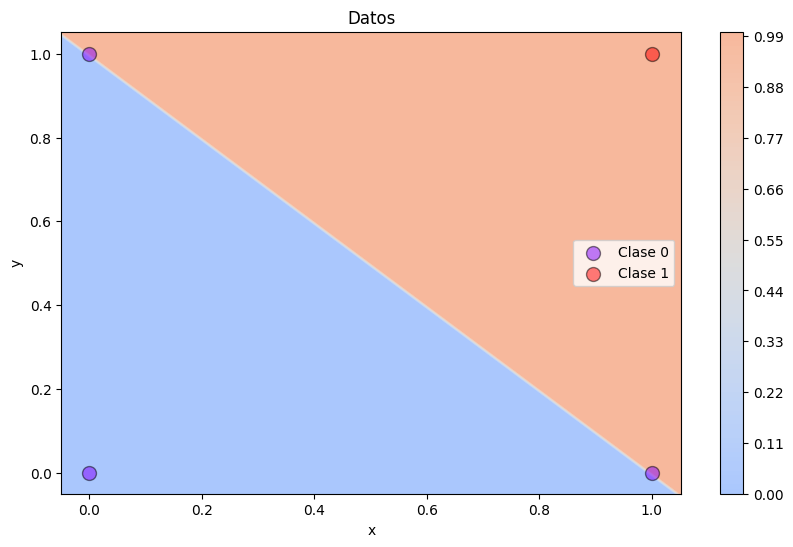

In [32]:
pl.figure(figsize = (10, 6))
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y, size=100)
pl.show()

### ¿Cómo programar una neurona para calcular la función XOR?

| $$X$$ | $$ Y $$ | $$ X\oplus Y $$ |
| - | - | - |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

<ipython-input-1-6e44a3dc2970>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


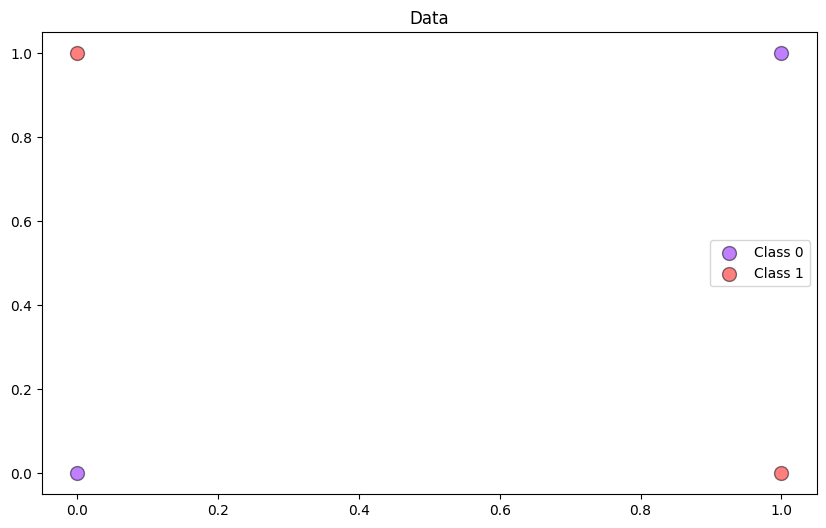

In [ ]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = [0, 1, 1, 0]

pl.figure(figsize = (10, 6))
plot_data(X, y, size=100)

In [ ]:
clf = Perceptron()
clf.fit(X, y)

Perceptron()

Observamos las predicciones y la superficie de decisión:

In [ ]:
print('Valor original: {}'.format(y))
print('Valor predicho: {}'.format(clf.predict(X)))
print('Accuracy: {}'.format(clf.score(X, y)))

Valor original: [0, 1, 1, 0]
Valor predicho: [0 0 0 0]
Accuracy: 0.5


<ipython-input-1-6e44a3dc2970>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


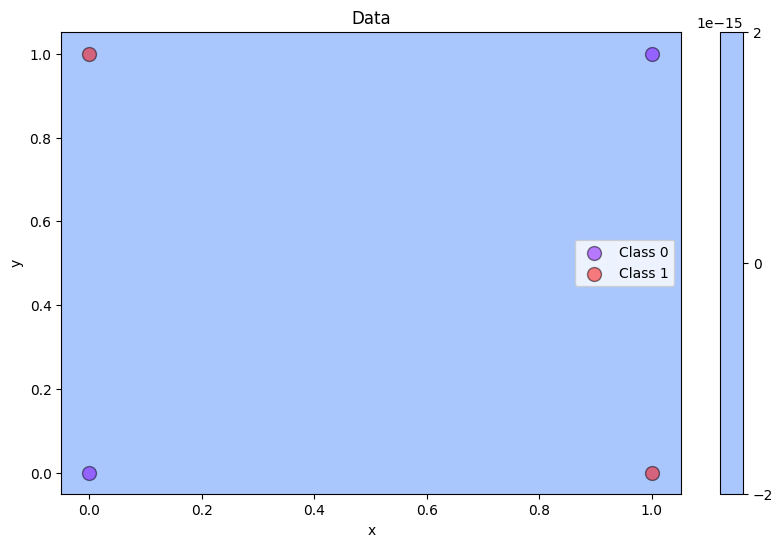

In [ ]:
pl.figure(figsize = (10, 6))
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y, size=100)

**Problemas**
* Es imposible encontrar un modelo lineal que separe los puntos de ambas clases en el problema XOR. Una solución es usar dos neuronas.

# Perceptron multicapa
El perceptron multicapa (Multilayer Perceptron, MLP en inglés) es un tipo especial de red neuronal en el cual se apilan varias capas de perceptrones. En inglés tambien se le denomina como **Feedforward neural network**. El perceptrón multicapa está motivado por la poca capacidad del perceptrón sencillo de modelar funciones no lineales. En un MLP agrupamos tantas capas como necesitemos. A continuación, presentamos una red multicapa que cuenta con:

* Capa de entrada: Recibe los datos de entrada.
* Capa oculta: Cuenta con uno o más neuronas.
* Capa de activación: Aplica una función de activación sobre la salida de cada neurona de la capa oculta.
* Cada de salida: Produce la predicción para completar la tarea supervisada. Puede ser de clasificación o *regresión*.

<img src="https://drive.google.com/uc?export=view&id=1LBqLV7G18rQ8SOJjayMQzBLwA3F-d7hN" align="middle">

## ¿Cómo resolver el problema de la función XOR?

Scikit-Learn nos permite trabajar con redes multicapa usando `sklearn.neural_network.MLPClassifier`. Una red multicapa se puede entrenar usando **gradiente descendente**, por lo tanto se pueden usanr métodos como **gradiente descendente estocástico** u otros métodos de optimización. El valor del gradiente determina qué tanto debo modificar los pesos de mi red (parámetros entrenables) para resolver la tarea de predicción.

A continuación vamos a definir la siguiente arquitectura para resolver el problema de la función XOR.

<img src="https://drive.google.com/uc?export=view&id=1ZmzYAPqV7eOe8o8yh6zNY2LfuI3qoOTF">

`MLPClassifier` permite definir esta arquitectura de la siguiente manera:

* **Capa de entrada**: El tamaño de la capa de entrada es definido cuando se llama a la función `fit()`. El tamaño está definido por el número de características (o columnas) de la matriz de características `X`.
* **Capa(s) ocultas**: El número de capas ocultas y el tamaño de cada una es definido por el parámetro `hidden_layer_size` de la clase `MLPClassifier`. Este parámetro consiste en una tupla de $n$ elementos, donde $n$ es igual al número de capas ocultas. Cada elemento de la tupla determina el número de neuronas de esa capa oculta.
* **Función de activación**: Esta función se define usando el parámetro `activation` de `MLPClassifier`. Este parámetro puede ser `logistic`, `relu`, `tanh` o `identity`.
* **Capa de salida**: Se define cuando se llama a la función `fit()`. La capa de salida contiene una única neurona, cuya función de activación se define con base al tipo de tarea de clasificación. Si es una tarea de clasificación binaria usa una función de activación logística. Si la tarea es multiclase se usa una función de activación SoftMax.

Adicionalmente `MLPClassifier` recibe los siguientes parámetros:

* `solver`: Puede ser '*lbfgs*', '*sgd*' o '*adam*'. '*lbfgs*' es una técnica de optimización muy útil para conjuntos pequeños. Mientras que '*sgd*' y '*adam*' usan gradiente descendente estocástico y son apropiados para conjunto de datos grandes.
* `alpha`: $\alpha$ controla el parámetro de regularización. $\alpha$ permite penalizar aquellos pesos $w$ grandes.

In [ ]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = [0, 1, 1, 0]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='logistic',
                    hidden_layer_sizes=2, random_state = 3)
clf.fit(X, y)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=2,
              random_state=3, solver='lbfgs')

Evaluamos el desempeño del clasificador sobre el conjunto de datos:

In [ ]:
clf.score(X, y)

1.0

Visualizamos la superficie de decisión:

<ipython-input-1-6e44a3dc2970>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,


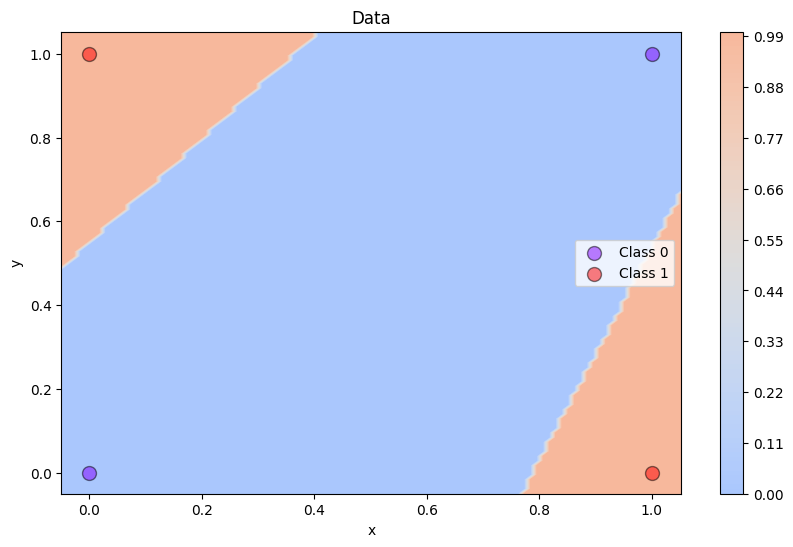

In [ ]:
pl.figure(figsize = (10, 6))
plot_decision_region(X, gen_pred_fun(clf))
plot_data(X, y, size=100)

`MLPClassifier` también nos permite acceder a la matriz de parámetros $w$ y a los sesgos $w_0$. `coefs_` nos regresa una lista que corresponde a los parámetros aprendidos. A continuación verificamos el tamaño de cada matriz y su respectivo valor.

In [ ]:
print([a.shape for a in clf.coefs_])
print(clf.coefs_)

[(2, 2), (2, 1)]
[array([[  7.91851479, -14.41460809],
       [ -6.39688935,   5.69721359]]), array([[-18.06349886],
       [-18.40160725]])]


Para acceder a los sesgos, se puede usar `.intercepts_`

In [ ]:
print([a.shape for a in clf.intercepts_])
print(clf.intercepts_)

### **Ventajas**

* A través de las capas ocultas, se pueden modelar relaciones de alto nivel entre las entradas. Por ejemplo, en el dominio de reconocimiento de objetos en imágenes, se puede aprender que el conjunto de dos ojos, una nariz y una boca forman una imagen.
* Las funciones de activación al ser no lineales, le permiten al modelo aprender funciones de separación más elaboradas.

### **Desventajas**
* La complejidad del modelo puede aumentar rápidamiente con respecto al número de capas y de neuronas por capa. Contemple el caso de una red con las siguientes características:
    * 1 capa de entrada de tamaño 50.
    * 1 capa oculta de $256$ neuronas.
    * 1 capa oculta de $512$ neuronas.
    * 1 capa de clasificación binaria.
* Bajo esta configuración tenemos que el número de parámetros está distribuido de la siguiente manera:
    * Conexiones entre la capa de entrada y la primera capa oculta: $256*50\ +\ 256 = 13056$. Donde la segunda parte corresponde a los sesgos.
    * Conexiones entre la primera capa oculta y la segunda capa oculta: $256*512\ +\ 512 = 131584$.
    * Conexiones entre la segunda capa oculta y la capa de clasificación: $512\ +\ 1 = 513$.
    * Para un total de $145153$ parámetros entrenables.

### Recomendaciones prácticas:
* Hacer un escalamiento de los datos de entrada. `MLPClassifier` es muy sensible a la escala de los datos de entrada.
* Explorar el número de neuronas por capa y el parámetro $\alpha$ usando `GridSearchCV`.
* Usar '*lbfgs*' como `solver` para conjuntos de datos pequeños. Mientras que '*adam*' es más recomendado para conjuntos de datos grandes.

## Little Red Riding Hood (Caperucita Roja)

`MLPClassifier` también puede manejar problemas de tipo multi-etiqueta. Considere el problema de caperucita roja, en el cual caperucita debe decidir qué acción llevar a cabo con base a la apariencia de la abuelita.

<img src="https://drive.google.com/uc?export=view&id=1umuROVDsjn-5aIiAlwmCzC2Byt8I80nc">

Generemos el conjunto de datos:

In [ ]:
from sklearn.neural_network import MLPClassifier
X = np.array([[1,1,0,0], [0,1,1,0], [0,0,0,1]])
y = np.array([[1,0,0,0], [0,0,1,1], [0,1,1,0]])
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
print(df.join(pd.DataFrame(y, columns=['Scream', 'Hug', 'Food', 'Kiss'])))

   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0         1          1         0         0       1    0     0     0
1         0          1         1         0       0    0     1     1
2         0          0         0         1       0    1     1     0


Usamos los siguientes parámetros:
* `solver`: *adam*
* `max_iter`: *5000*

Definimos una red multicapa con una capa oculta de tamaño $3$.

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=5000,
                    hidden_layer_sizes=(3), random_state=1)
clf.fit(X, y)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=3,
              max_iter=5000, random_state=1)

Scikit-Learn nos permite consultar las probabilidades para cada etiqueta así:

In [ ]:
y_prob = clf.predict_proba(X)
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
print(df.join(pd.DataFrame(y_prob, columns=['Scream', 'Hug', 'Food', 'Kiss'])))

   Big Ears  Big Teeth  Handsome  Wrinkled    Scream       Hug      Food  \
0         1          1         0         0  0.966333  0.006157  0.034453   
1         0          1         1         0  0.027335  0.121834  0.969976   
2         0          0         0         1  0.005170  0.899613  0.996505   

       Kiss  
0  0.048857  
1  0.896725  
2  0.056885  


Al momento de hacer las predicciones, `MLPClassifier` toma aquellas probabilidades mayores a $0.5$ y les asigna la etiqueta $1$, mientras que aquellos valores menores a $0.5$ le son asignados la etiqueta $0$.

In [ ]:
y_pred = clf.predict(X)
df = pd.DataFrame(X, columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
print(df.join(pd.DataFrame(y_pred, columns=['Scream', 'Hug', 'Food', 'Kiss'])))

   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0         1          1         0         0       1    0     0     0
1         0          1         1         0       0    0     1     1
2         0          0         0         1       0    1     1     0


Verificamos el accuracy en el conjunto de datos:

In [ ]:
clf.score(X, y)

1.0

Visualizamos la curva de pérdida a lo largo de cada ejemplo proporcionado al modelo.

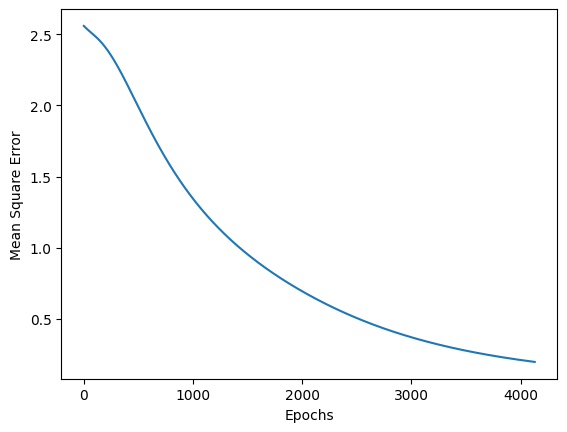

In [ ]:
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.plot(clf.loss_curve_)

**Creditos: Porf. Fabio Gonzalez UNAL**